<a href="https://colab.research.google.com/github/MFBS2005/gomycode/blob/main/checkpoint7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
x=pd.read_csv("/content/drive/My Drive/titanic-passengers.csv",sep=";")
x.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [177]:
x.info()
x.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [178]:
print(x.isnull().sum())
x["Cabin"].value_counts()
x["Cabin"].fillna("B98",inplace=True)
x["Embarked"].value_counts()
x["Embarked"].fillna("S",inplace=True)
x["Age"].fillna(x["Age"].mean(),inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [179]:
print(x.isnull().sum().sum())

0


In [180]:
x.info()
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
l1=["Survived","Ticket","Cabin","Embarked"]
for i in l1:
  x[i]=encoder.fit_transform(x[i])
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

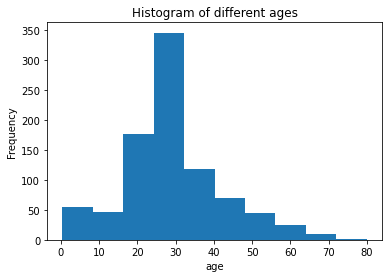

In [181]:
import matplotlib.pyplot as plt
plt.title("Histogram of different ages")
plt.xlabel("age")
x["Age"].plot.hist()

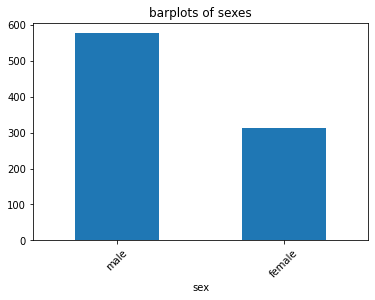

In [182]:
plt.title("barplots of sexes")
plt.xlabel("sex")
plt.ylabel("")
rr=x["Sex"].value_counts()
rr.plot.bar(rot=45)

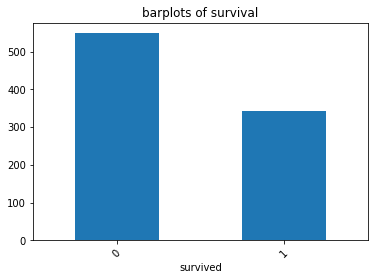

In [183]:
plt.title("barplots of survival")
plt.xlabel("survived")
plt.ylabel("")
rr=x["Survived"].value_counts()
rr.plot.bar(rot=45)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


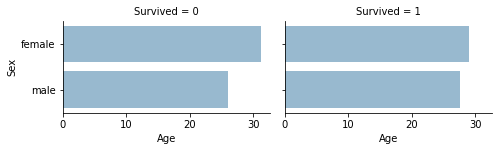

In [184]:
import seaborn as sns
grid=sns.FacetGrid(x,col="Survived",height=2.2,aspect=1.6)
grid.map(sns.barplot,"Age","Sex",ci=None,alpha=.5)

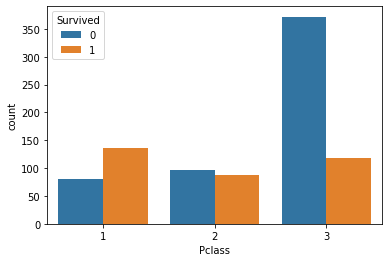

In [185]:
import seaborn as sns
nn=sns.countplot(x="Pclass",hue="Survived",data=x)

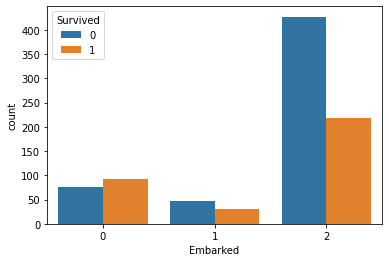

In [186]:
import seaborn as sns
nn=sns.countplot(x="Embarked",hue="Survived",data=x)

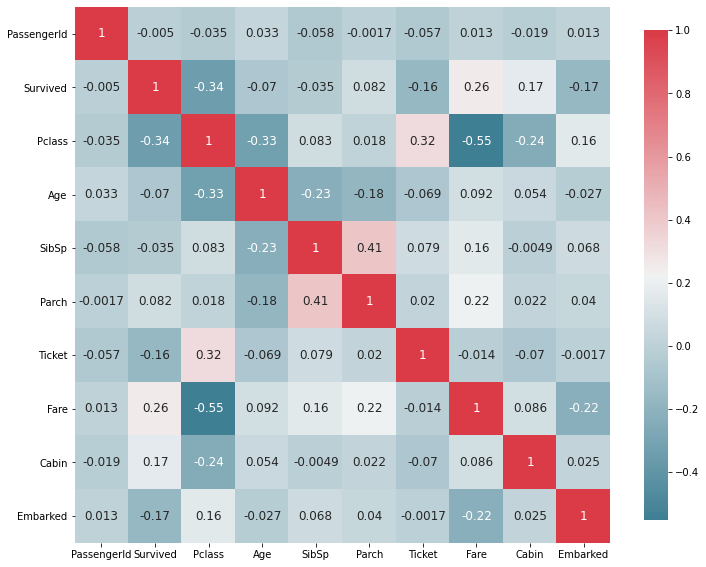

In [187]:
import seaborn as sns
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(x)
#the biggest positive correlation:between Parch and sibSp
#the biggest negative correlation:between Pclass and Fare


In [188]:
x[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [189]:
import re
def gettitle(name):
  title=re.findall(r"\b[A-Z][a-z]+\.",name)
  return title[0]
x["Title"]=x["Name"].apply(gettitle)
x["Title"].head()

0     Mr.
1     Mr.
2     Mr.
3    Mrs.
4     Mr.
Name: Title, dtype: object

In [190]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,159,13.0000,48,2,Mr.
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,347,7.6500,141,2,Mr.
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,409,7.8542,48,2,Mr.
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,395,21.0750,48,2,Mrs.
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,569,52.0000,38,2,Mr.


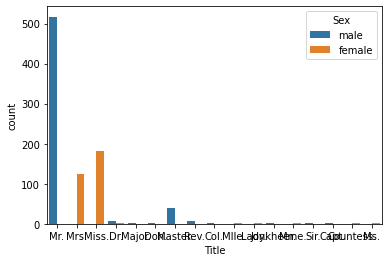

In [191]:
import seaborn as sns
nn=sns.countplot(x="Title",hue="Sex",data=x)

In [192]:
title_Dictionary = { "Capt.":       "Officer",

                    "Col.":        "Officer",

                    "Major.":      "Officer",

                      "Dr.":         "Officer",

                    "Rev.":        "Officer" ,

                    "Jonkheer.":   "Royalty",

                    "Don.":        "Royalty",

                    "Sir." :       "Royalty",

                   "Lady." :      "Royalty",

                  "the Countess.": "Royalty",

                    "Dona.":       "Royalty",

                    "Mme.":        "Miss",

                    "Mlle.":       "Miss",

                    "Miss." :      "Miss",

                    "Ms.":         "Mrs",

                    "Mr." :        "Mrs",

                    "Mrs." :       "Mrs",

                    "Master." :    "Master" }
x["Title"].replace(title_Dictionary,inplace=True)
x["Title"].value_counts()

Mrs          643
Miss         185
Master        40
Officer       18
Royalty        4
Countess.      1
Name: Title, dtype: int64

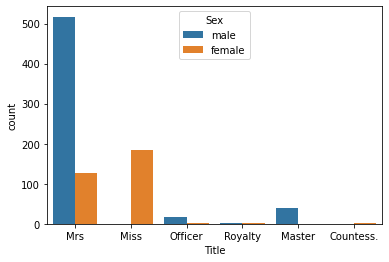

In [193]:
import seaborn as sns
nn=sns.countplot(x="Title",hue="Sex",data=x)

In [194]:
x["FamilySize"]=x["Parch"]+x["SibSp"]
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,159,13.0000,48,2,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,347,7.6500,141,2,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,409,7.8542,48,2,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,395,21.0750,48,2,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,569,52.0000,38,2,Mrs,1


In [195]:
x[["FamilySize","Survived"]].groupby(["FamilySize"],as_index=True).mean()

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [196]:
x.info()
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
 12  Title        891 non-null    object 
 13  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 97.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,159,13.0000,48,2,Mrs,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,347,7.6500,141,2,Mrs,0
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,409,7.8542,48,2,Mrs,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,395,21.0750,48,2,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,569,52.0000,38,2,Mrs,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
l1=["Sex","Title"]
for i in l1:
  x[i]=encoder.fit_transform(x[i])
l2=["Name","Cabin","PassengerId"]
for i in l2:
  x.drop(i,axis=1,inplace=True)
x.info()

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(tree2,filled=True,feature_names=x.columns,proportion=True)

score:0.7932960893854749


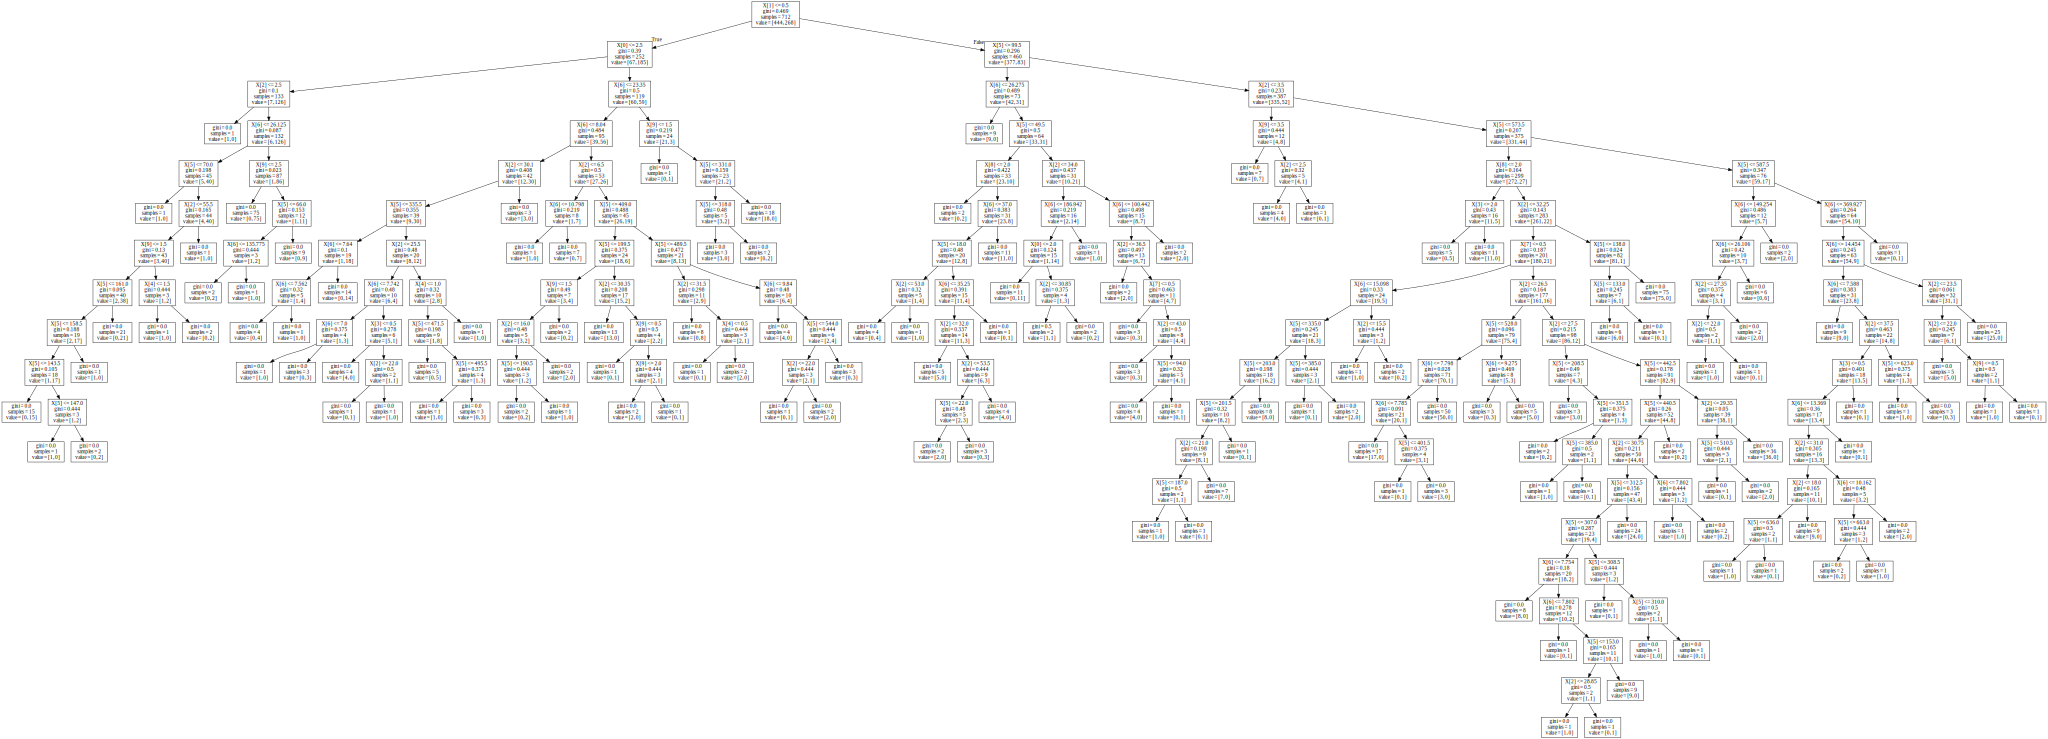

In [211]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
xx=x.drop("Survived",axis=1,inplace=False)
y=x["Survived"]
xx_train, xx_test, y_train, y_test = train_test_split(xx,y, test_size=0.20,random_state=10)
tree2= tree.DecisionTreeClassifier()  
tree2.fit(xx_train, y_train) 
y_pred=tree2.predict(xx_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))
import graphviz
dot_data=tree.export_graphviz(tree2,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("x")
graph

In [212]:
xx=x.drop("Survived",axis=1,inplace=False)
y=x["Survived"]
xx_train, xx_test, y_train, y_test = train_test_split(xx,y, test_size=0.20,random_state=10)
tree3= tree.DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=4,max_leaf_nodes=10)  
tree2.fit(xx_train, y_train) 
y_pred=tree2.predict(xx_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7988826815642458


In [ ]:
#the new accuracy is higher than the old one(0.7988826815642458>0.7932960893854749)

In [219]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=100)
clf.fit(xx_train, y_train) 
y_pred=clf.predict(xx_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8491620111731844


In [222]:
clf=RandomForestClassifier(n_estimators=1000)
clf.fit(xx_train, y_train) 
y_pred=clf.predict(xx_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8547486033519553


In [ ]:
#the new the new accuracy is higher than the old one(0.8547486033519553>0.8491620111731844)